In [1]:
from core.dataloaders.focus_dataloader import PytorchFoCusDatasetV2, FoCusDatasetV1
from core.tokenizers.bart_tokenizers import BartFoCusTokenizerV1
from core.hyperparameters.bart_hyperparameters import BartHyperparametersV1

hyper = BartHyperparametersV1()
focus_dataset = FoCusDatasetV1(
    input_dataset_path="./datasets/FoCus/valid_focus.json"
)

tokenizer = BartFoCusTokenizerV1.from_pretrained(
    "facebook/bart-base",
    hyperparameters=hyper,
)

pytorch_foc = PytorchFoCusDatasetV2(
    dataset=focus_dataset,
    tokenizer=tokenizer,
    hyperparameters=hyper,
)

/home/dimweb/Desktop/deeppavlov/d_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
from core.dataloaders.focus_dataloader import FoCusLightningDataModuleV2
from core.tokenizers.bart_tokenizers import BartFoCusTokenizerV1
from core.hyperparameters.bart_hyperparameters import BartHyperparametersV2
from core.base_models.bart_models import BartLMV2
from transformers import BartConfig

hyper = BartHyperparametersV2()

tokenizer = BartFoCusTokenizerV1.from_pretrained(
    hyper.model_name,
    hyperparameters=hyper,
)

data_module = FoCusLightningDataModuleV2(
    train_path_dataset="./datasets/FoCus/train_focus.json",
    valid_path_dataset="./datasets/FoCus/valid_focus.json",
    hyperparameters=hyper,
    tokenizer=tokenizer,  
    is_debug=False,
)
data_module.setup()
# input_item = next(iter(data_module.train_dataloader()))

# model = BartLMV2(
#     config=BartConfig.from_pretrained(hyper.model_name),
#     hyperparameters=hyper,
#     tokenizer=tokenizer,
# )

# model.resize_token_embeddings(len(tokenizer))
# model.forward(
#     **input_item,
# )
# print("Done")

# measure the time
import time
start_time = time.time()
for item in data_module.train_dataloader():
    item2 = item
    print(item2)

for item in data_module.val_dataloader():
    item2 = item
    print(item2)

print("--- %s seconds ---" % (time.time() - start_time))

In [4]:
import torch
from torch import nn

# head = nn.Linear(3, 4, bias=False)
# input = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
# logits = head(input)
# targets = torch.tensor([1, 2], dtype=torch.long)
# loss = nn.BCELoss()(logits, targets)

input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
input, target


(tensor([[-0.3922,  1.7638,  0.5222,  0.3016, -0.2778],
         [ 1.3271, -1.2603, -0.0327, -0.4648, -1.5070],
         [-1.0322,  0.2424, -1.2268,  1.4694, -1.6350]], requires_grad=True),
 tensor([3, 1, 1]))

In [7]:
from torch.nn import Sigmoid
import torch
(Sigmoid()(torch.randn([2, 10])) > 0.5).int().view(-1)

tensor([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       dtype=torch.int32)

In [29]:
import torch
target = torch.randint(0, 5, (2, 1)).view(-1)
logits = torch.randn(2, 5)
preds = torch.argmax(logits, dim=1)
print(preds)
print(target)
(preds == target).float().mean().cpu().item()

tensor([1, 3])
tensor([0, 4])


0.0

In [6]:
torch.randint(0, 10, [2, 1])

tensor([[9],
        [8]])

In [13]:
import torch

batch_size = 2
num_classes = 11

loss_fn = torch.nn.BCELoss()

outputs_before_sigmoid = torch.randn(batch_size, num_classes, dtype=torch.float32)
sigmoid_outputs = torch.sigmoid(outputs_before_sigmoid)
target_classes = torch.randn((batch_size, num_classes))  # randints in [0, 2).

loss = loss_fn(sigmoid_outputs, target_classes)

# alternatively, use BCE with logits, on outputs before sigmoid.
loss_fn_2 = torch.nn.BCEWithLogitsLoss()
loss2 = loss_fn_2(outputs_before_sigmoid, target_classes)
print(loss, loss2)

tensor(1.1145) tensor(1.1145)


In [7]:
torch.randn([2, 5])

tensor([[ 0.5799,  0.4033,  0.1488, -1.3507,  1.3772],
        [ 0.2756,  0.4271,  0.2537,  0.6392, -1.0257]])

In [5]:
target = torch.ones([2, 5], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([2, 5], 1.5)  # A prediction (logit)
pos_weight = torch.ones([5])  # All weights are equal to 1
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion(output, target)  # -log(sigmoid(1.5))
output, target

(tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
         [1.5000, 1.5000, 1.5000, 1.5000, 1.5000]]),
 tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]))

In [4]:
sample = pytorch_foc[11]
input_ids = sample["input_ids"]
print(sample["dialog_bos_index"])
dialog_bos = tokenizer.get_vocab().get(hyper.dialog_bos_token)

assert sample["dialog_bos_index"] == input_ids.index(dialog_bos), f"dialog_bos_index {sample['dialog_bos_index']} {input_ids.index(dialog_bos)}" 

print(sample["dialog_eos_index"])
dialog_eos = tokenizer.get_vocab().get(hyper.dialog_eos_token)
input_ids.index(dialog_eos)
assert sample["dialog_eos_index"] == input_ids.index(dialog_eos), f"dialog_eos_index {sample['dialog_eos_index']} {input_ids.index(dialog_eos)}"

249
272


In [2]:
from core.tokenizers.bart_tokenizers import BartFoCusTokenizerV1
tokenizer = BartFoCusTokenizerV1.from_pretrained("facebook/bart-base",)

tokenizer.batch_encode_plus(["hello", "world"], add_special_tokens=False)

/home/dimweb/Desktop/deeppavlov/d_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'input_ids': [[42891], [8331]], 'attention_mask': [[1], [1]]}

In [3]:
tokenizer.pad_token_id

1

In [3]:
from core.dataloaders.focus_dataloader import FoCusDatasetV1
from core.tokenizers.bart_tokenizers import BartFoCusTokenizerV1

train_focus_dataset = FoCusDatasetV1(
    input_dataset_path="./datasets/FoCus/train_focus.json"
)

valid_focus_dataset = FoCusDatasetV1(
    input_dataset_path="./datasets/FoCus/valid_focus.json"
)

tokenizer = BartFoCusTokenizerV1.from_pretrained("facebook/bart-base",)

/home/dimweb/Desktop/deeppavlov/d_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_hist(x: np.ndarray, stage: str):
    fig, ax = plt.subplots()
    ax.hist(x,linewidth=0.5, edgecolor="white", bins=300)
    plt.gca().set(title=stage, ylabel='Frequency')
    plt.show()

In [10]:
def show_lengths_hist(dataset: FoCusDatasetV1, field: str, stage: str):
    lengths = []
    items_set = set()
    for i in range(len(dataset)):
        sample = dataset[i]
        for item in sample[field]:
            items_set.add(item)
            
    items_set = list(items_set)
    for item in items_set:
        tokens = tokenizer.encode(item, add_special_tokens=False)
        tokens_len = len(tokens)
        lengths.append(tokens_len)
    
    visualize_hist(np.array(lengths), stage)


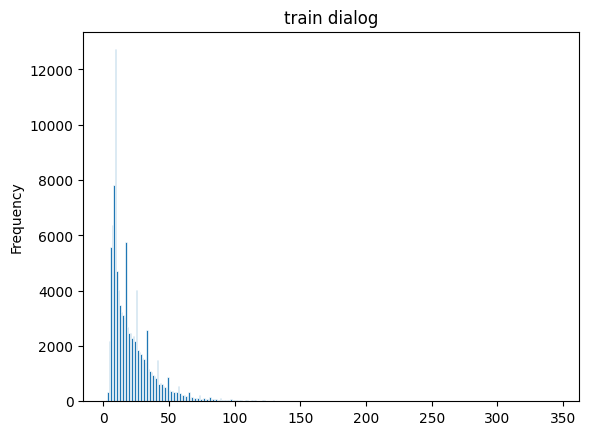

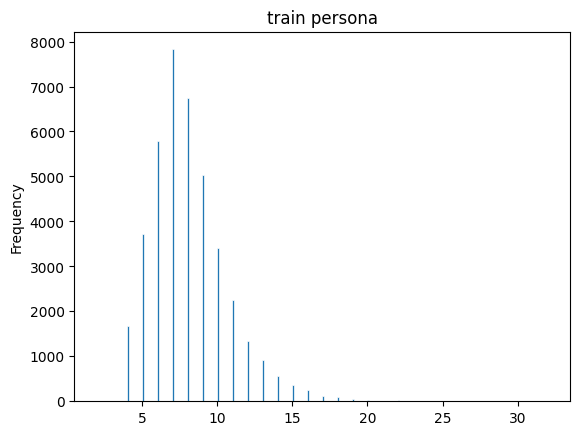

Token indices sequence length is longer than the specified maximum sequence length for this model (1159 > 1024). Running this sequence through the model will result in indexing errors


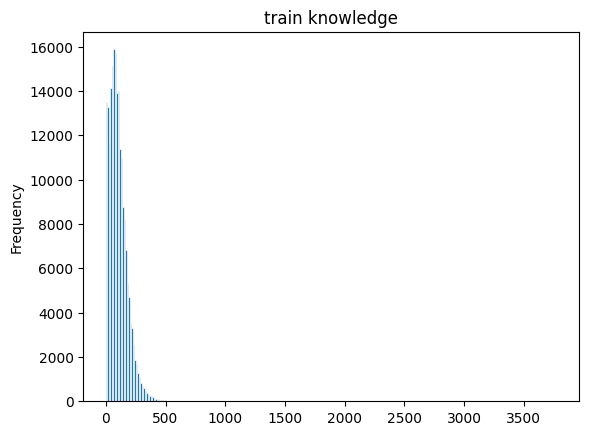

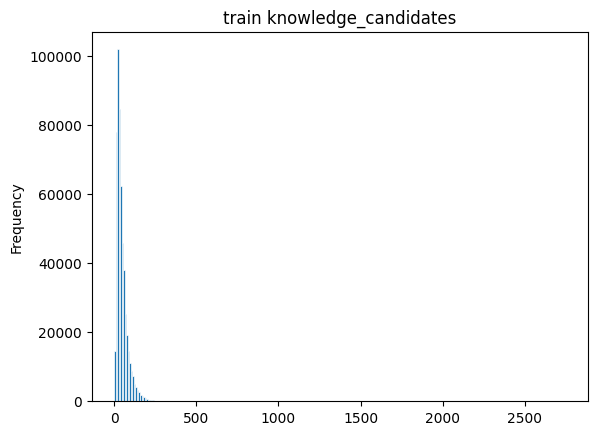

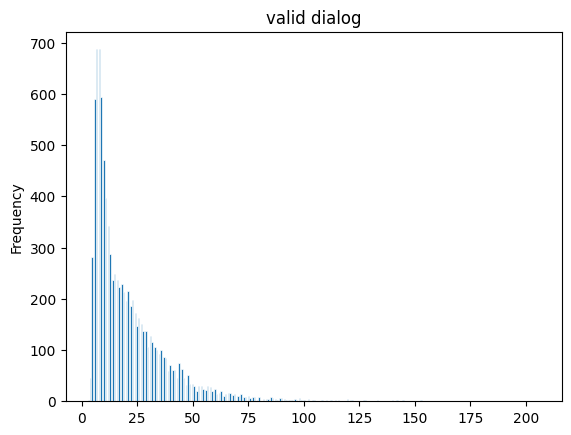

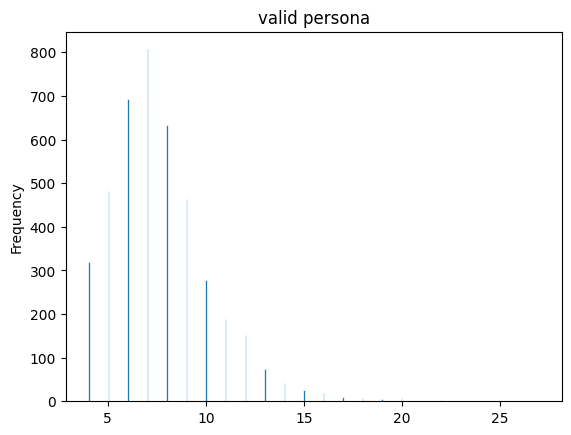

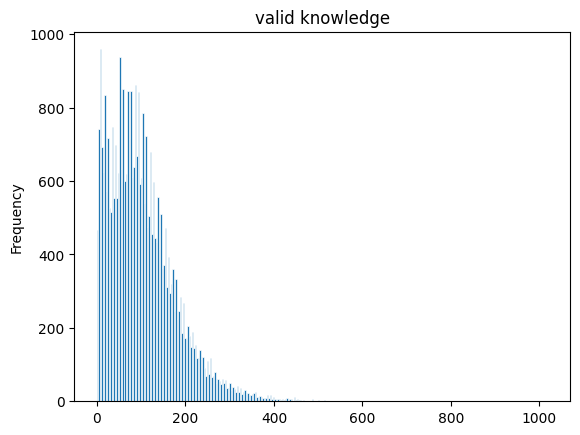

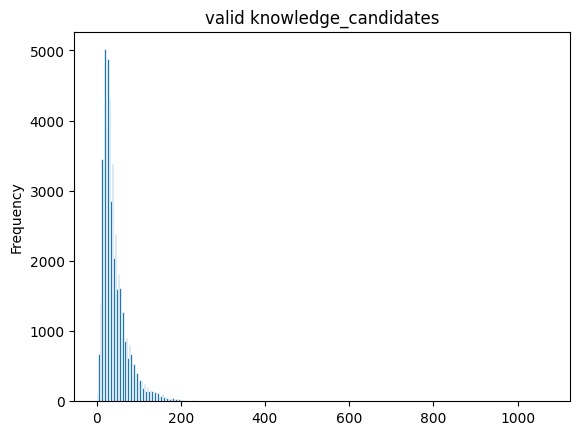

In [11]:
count_items = [
    [train_focus_dataset, 'dialog', 'train dialog'],
    [train_focus_dataset, 'persona', 'train persona'],
    [train_focus_dataset, 'knowledge', 'train knowledge'],
    [train_focus_dataset, 'knowledge_candidates', 'train knowledge_candidates'],
    [valid_focus_dataset, 'dialog', 'valid dialog'],
    [valid_focus_dataset, 'persona', 'valid persona'],
    [valid_focus_dataset, 'knowledge', 'valid knowledge'],
    [valid_focus_dataset, 'knowledge_candidates', 'valid knowledge_candidates'],
]

for item in count_items:
    show_lengths_hist(*item)

# charF++

In [2]:
from torchmetrics import CHRFScore
preds = ['the cat is on the mat']
target = [['there is a cat on the mat', 'a cat is on the mat']]
metric = CHRFScore()
metric(preds, target)

/home/dimweb/Desktop/deeppavlov/d_env/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:198: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_n_grams[n] = tensor(sum(n_grams_counts[n].values()))
/home/dimweb/Desktop/deeppavlov/d_env/lib/python3.10/site-packages/torchmetrics/functional/text/chrf.py:225: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matching_n_grams[n] = tensor(


tensor(0.8640)

# ROUGE-L

In [11]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')
rouge_score = scores['rougeL'].fmeasure
rouge_score

0.5882352941176471

In [14]:
from datasets import load_metric
bleu_metric = load_metric("sacrebleu")
bleu_metric.compute(
    predictions=["The quick brown fox jumps over the lazy dog."], 
    references=[["The quick brown dog jumps on the log."]]
)['score']

19.304869754804493

# generate text transfomers

In [2]:
from core.lighting_models.bart_lighting import BARTLightningModelV2
from core.base_models.bart_models import BartLMV4, BartLMV5
from core.hyperparameters.lighting_hyperparameters import LightingHyperparametersV1
from core.hyperparameters.bart_hyperparameters import BartHyperparametersV3
from core.tokenizers.bart_tokenizers import BartFoCusTokenizerV2
from transformers import BartConfig
from typing import List
from core.dataloaders.focus_dataloader import FoCusDatasetV1, FoCusLightningDataModuleV3
from core.tokenizers.bart_tokenizers import BartFoCusTokenizerV1
from core.dataloaders.focus_dataloader import PytorchFoCusDatasetV3, FoCusDatasetV1
import torch

lighting_hyperparameters = LightingHyperparametersV1(
    precision=16,
    max_epochs=1,
).__dict__

hyperparameters = BartHyperparametersV3(
    lighting_hyperparameters=lighting_hyperparameters,
)

tokenizer = BartFoCusTokenizerV2.from_pretrained(
    hyperparameters.model_name,
    hyperparameters=hyperparameters,
)

pytorch_dataset = PytorchFoCusDatasetV3(
    dataset=FoCusDatasetV1(
        input_dataset_path="./datasets/FoCus/train_focus.json",
    ),
    tokenizer=tokenizer,
    hyperparameters=hyperparameters,
)

pos = 10
item = pytorch_dataset[pos]
input_ids = item['input_ids']
query_bos_token = item['query_bos_index']
query_eos_token = item['query_eos_index']
knowledge_candidates_sep_index = item['knowledge_candidates_sep_index']
persona_sep_index = item['persona_sep_index']
eos_index = item['eos_index']
persona_sep_index = item['persona_sep_index']

print(tokenizer.decode(input_ids))
print(tokenizer.decode(input_ids[:persona_sep_index+1]))
print(tokenizer.decode(input_ids[persona_sep_index:knowledge_candidates_sep_index+1]))
print(tokenizer.decode(input_ids[query_bos_token:query_eos_token+1]))
print(tokenizer.decode(input_ids[:eos_index+1]))


base_model = BartLMV5(
    config=BartConfig.from_pretrained(hyperparameters.model_name),  # type: ignore
    hyperparameters=hyperparameters,
    tokenizer=tokenizer,  # type: ignore
)

model = BARTLightningModelV2.load_from_checkpoint(
    "./Test/2tc0jzc2/checkpoints/facebook/bart-base-epoch=00-valid_loss=3.19.ckpt",
    base_model=base_model,
)

data_module = FoCusLightningDataModuleV3(
    train_path_dataset="./datasets/FoCus/train_focus.json",
    valid_path_dataset="./datasets/FoCus/valid_focus.json",
    hyperparameters=hyperparameters,
    tokenizer=tokenizer,  # type: ignore
    is_debug=False,
)
data_module.setup()
example = next(iter(data_module.train_dataloader()))

<s>I want to visit Mexico.I am interested in the Mayan civilization.I like jaguars.I am interested in rainforests.I am interested in archaeology.</s>In 1785, an official by the name of Diego Ruiz stumbled upon the Pyramid of the Niches, whilst looking for clandestine tobacco plantings breaching the royal monopoly in this isolated area rarely visited by the authorities.</s> <query> I know this place, but I don't remember the name of this place. </query> <response> This is the Lacandon Jungle that is an area of rainforest which stretches from Chiapas, Mexico, into Honduras and into the southern part of the Yucatán Peninsula. </response> </s>
<s>I want to visit Mexico.I am interested in the Mayan civilization.I like jaguars.I am interested in rainforests.I am interested in archaeology.</s>
</s>In 1785, an official by the name of Diego Ruiz stumbled upon the Pyramid of the Niches, whilst looking for clandestine tobacco plantings breaching the royal monopoly in this isolated area rarely vis

In [7]:
example

105

In [21]:
def slice_input_features(e, pos=0):
    i = e['input_ids'][pos].tolist().index(tokenizer.get_vocab().get(hyperparameters.response_bos_token))
    b = e['query_input_ids'][pos][e['query_input_attention_mask'][pos] == 1].tolist()
    return e['input_ids'][pos][: i:].tolist(), b
res = slice_input_features(example)

tokenizer.decode(res[0][:-1]), tokenizer.decode(res[1])

('<s>I am doing a research about Native Americans.I am from Phoenix.I love Victorian Queen Anne style.I need information about World War I.I like Assimilation.</s>Brick was used as a primary material for the first building as well as the second. After the 1906 San Francisco earthquake, most buildings in this style were constructed of concrete. The use of brick at Memorial Hall shows "a complete lack of understanding" of the evolution of the style.</s> <query> What material are the school buildings made of?',
 '<s>I am doing a research about Native Americans.I am from Phoenix.I love Victorian Queen Anne style.I need information about World War I.I like Assimilation.</s>Brick was used as a primary material for the first building as well as the second. After the 1906 San Francisco earthquake, most buildings in this style were constructed of concrete. The use of brick at Memorial Hall shows "a complete lack of understanding" of the evolution of the style.</s> <query> What material are the 

In [36]:
pos = 0
example_1 = example['query_input_ids'][pos][example['query_input_attention_mask'][pos] == 1].tolist()
class GreedyDecoding:
    def __init__(self, 
            model=None,
            max_length=20,
            tokenizer=None,
            input_ids=None,
            hyperparameters=None,
        ):
        self.model = model
        self.hyparameters = hyperparameters
        self.max_length = max_length
        self.tokenizer = tokenizer
        self.input_ids: List = list(input_ids)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # self.model.to(self.device)
        self.model.eval()

        self.current_step = 0
        self.response_token_id = self.tokenizer.get_vocab().get(self.hyparameters.response_eos_token)
        self.model_max_length = tokenizer.model_max_length
        self.generated_ids = []
    
    @property
    def is_stop(self):
        condition_1 = self.current_step >= self.max_length
        condition_2 = self.input_ids[-1] in [self.response_token_id, self.tokenizer.eos_token_id]
        conditions = [condition_1, condition_2]
        return any(conditions)

    def next(self):
        if self.is_stop:
            return
        # print(self.input_ids)
        input_ids = self.input_ids[-self.model_max_length:]
        tensor_input_ids = torch.tensor([input_ids]).to(self.device)
        attention_mask = torch.tensor([[1] * len(input_ids)]).to(self.device)
        input_dict = {
            "input_ids": tensor_input_ids,
            "attention_mask": attention_mask,
        }

        outputs = self.model(**input_dict)

        logits = outputs.lm_logits
        next_token_logits = logits[:, -1, :]
        next_token = torch.argmax(next_token_logits, dim=-1)
        next_token = next_token.tolist()[0]

        self.generated_ids.append(next_token)
        self.input_ids.append(next_token)

        self.current_step += 1
    
    def run(self):
        while not self.is_stop:
            self.next()
    
    @property
    def generated_text(self):
        return self.tokenizer.decode(self.generated_ids, skip_special_tokens=True)
    
    @property
    def all_text(self):
        return self.tokenizer.decode(self.input_ids, )

greedy_decoding = GreedyDecoding(
    model=model,
    max_length=30,
    tokenizer=tokenizer,
    input_ids=res[0],
    hyperparameters=hyperparameters,
)
greedy_decoding.run()
# greedy_decoding.generated_text
greedy_decoding.all_text

'<s>I am doing a research about Native Americans.I am from Phoenix.I love Victorian Queen Anne style.I need information about World War I.I like Assimilation.</s>Brick was used as a primary material for the first building as well as the second. After the 1906 San Francisco earthquake, most buildings in this style were constructed of concrete. The use of brick at Memorial Hall shows "a complete lack of understanding" of the evolution of the style.</s> <query> What material are the school buildings made of? </query> <response>  constructed owner Memorial of the top the information. constructed this department theB Francisco shows style of department department top. World of of of of Hall most'

In [21]:
tokenizer.decode([0], skip_special_tokens=True)

''

In [32]:
tokenizer.decode(example['input_ids'][0][example['attention_mask'][0] == 1].tolist())

'<s>I am doing a research about Native Americans.I am from Phoenix.I love Victorian Queen Anne style.I need information about World War I.I like Assimilation.</s>Brick was used as a primary material for the first building as well as the second. After the 1906 San Francisco earthquake, most buildings in this style were constructed of concrete. The use of brick at Memorial Hall shows "a complete lack of understanding" of the evolution of the style.</s> <query> What material are the school buildings made of? </query> <response> Most of the structure is made of bricks and the last additions of the last century were made with concrete. </response> </s>'

In [35]:
a = torch.randn((1, 3, 10))
a

tensor([[[-1.2678, -1.3588, -0.8905, -0.2396, -0.7440,  0.6908,  0.8640,
          -0.1350, -1.2240, -0.2672],
         [-0.7785,  0.4946, -0.0684, -0.8602, -0.7068, -0.3871, -1.1150,
          -1.2920,  0.5792,  0.6548],
         [-0.1320,  0.2525,  0.2028, -0.5883,  1.1872,  0.9090,  0.0232,
           1.8990,  1.9532,  1.0580]]])

In [38]:
torch.argmax(a[:, -1, :], dim=-1).tolist()[0]

8

In [43]:
[1, 2, 3, 4, 5][-40:]

[1, 2, 3, 4, 5]